***Import necessary libraries***

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

***Task#1: Merge the 12 months of sales data into a single csv file***

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data")]
for file in files:
   print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
   df = pd.read_csv("./Sales_Data/"+file)
   all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index = False)

***Read in Updated DataFrame***

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


***Task 2:Data cleaning***

***Drop empty rows and Nan values***

In [5]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data.dropna(how = 'all',inplace = True) #can also e written as: all_data = all_data.dropna(how = 'all')
all_data = all_data.reset_index(drop = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


***Find Or and delete it***

In [7]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


***Convert columns to the correct type***

In [8]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #make float


***Augment data with additional column***

***Task 3: Add Month column***

In [9]:
all_data["Month"] = all_data["Order Date"].str[0:2]
# coverting to numeric
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


***Add a Sales column***

In [10]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


***Task 4: Add a City column***

In [11]:
# Let's use .apply()
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
# can also use if applying single function: all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


***Question 1: What was the best month for sales? How much was earned that month?***

In [12]:
all_data.groupby("Month").sum("Sales")

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


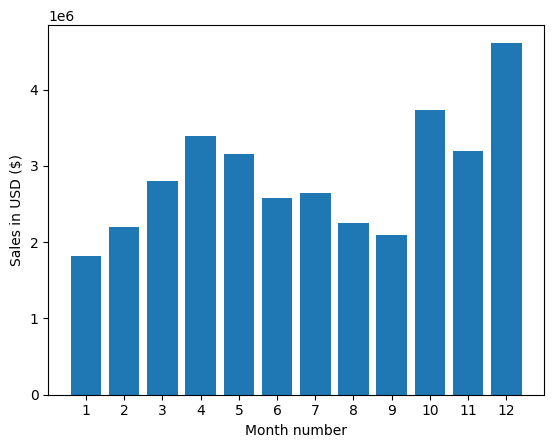

In [13]:
months = range(1,13)
results = all_data.groupby("Month").sum()

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")

plt.show()

***Month of December has the highest number of Sales and the amount of Sales is around $4.61M***

***Question:2 Which city has the highest number of Sales?***

In [14]:
results = all_data.groupby("City").sum("Sales")
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


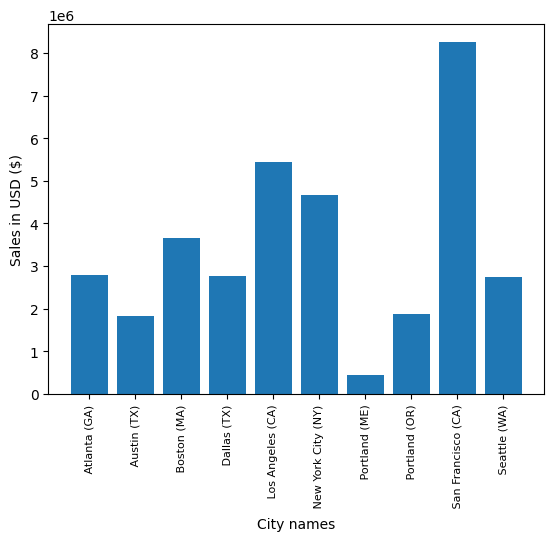

In [15]:
cities = [city for city, df in all_data.groupby('City')]
results = all_data.groupby("City").sum()

plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City names")

plt.show()

***With the above analysis it is clear that San Francisco(CA) has the highest number of sales***

***Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?***  

In [16]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12544\282589525.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [17]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [18]:
results = all_data.groupby("Hour").count()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


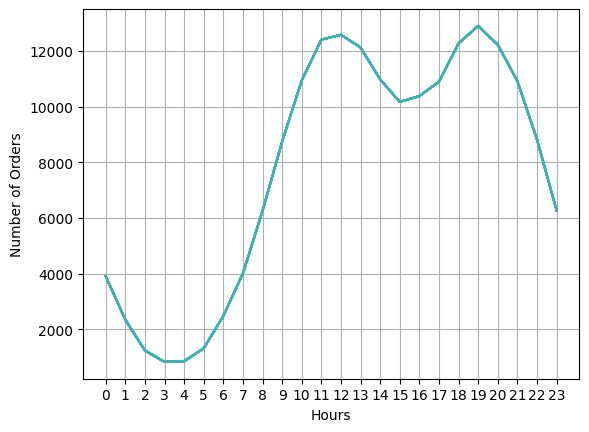

In [19]:
Hour = [hour for hour, df in all_data.groupby('Hour')]
results = all_data.groupby("Hour").count()

plt.plot(Hour,results)
plt.xticks(Hour)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()


plt.show()

The above Chart shows us that the count of Order peaks around 11am and 7pm. Thus,we should display advertisements around the same time to maximize likelihood of customer's buying product.

***Question 4: What products are most often sold together?***

In [20]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12544\2493394054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
from itertools import combinations
from collections import Counter


count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


***The above analysis shows the 10 most common products that are sold together*** 

***Question 5: What product sold the most? Why do you think it sold the most?***

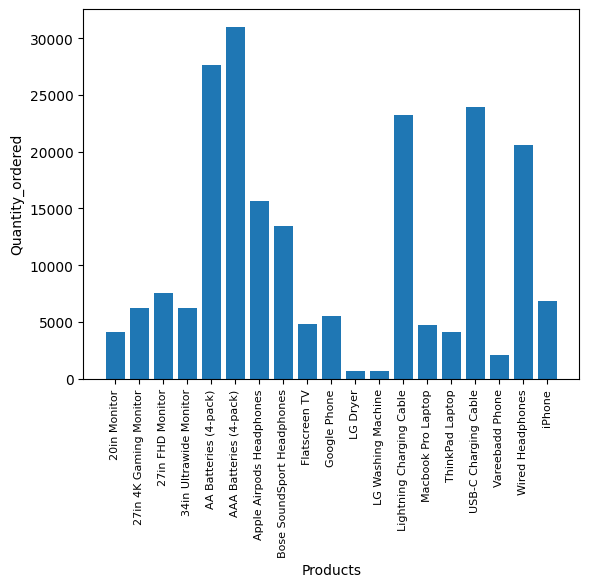

In [22]:
product_group = all_data.groupby("Product").sum("Quantity Ordered")
quantity_ordered = product_group["Quantity Ordered"]
# products = [product for product ,df in product_group]
products = product_group.index
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel("Quantity_ordered")
plt.xlabel("Products")

plt.show()


From the above graph we can conclude that AA Batteries,AAA Batteries,Lightning charging cable,USB-C-Charging cable, Wired headphones are the products that sold the most.

In [23]:
prices = all_data.groupby("Product").mean("Price Each")
print(prices)



                            Quantity Ordered  Price Each     Month  \
Product                                                              
20in Monitor                        1.006828      109.99  7.153377   
27in 4K Gaming Monitor              1.002247      389.99  7.133226   
27in FHD Monitor                    1.005728      149.99  7.001199   
34in Ultrawide Monitor              1.002912      379.99  7.005986   
AA Batteries (4-pack)               1.343004        3.84  7.073820   
AAA Batteries (4-pack)              1.502689        2.99  7.091226   
Apple Airpods Headphones            1.007203      150.00  7.040774   
Bose SoundSport Headphones          1.009906       99.99  7.062889   
Flatscreen TV                       1.003958      300.00  7.130000   
Google Phone                        1.001267      600.00  6.933032   
LG Dryer                            1.000000      600.00  6.784830   
LG Washing Machine                  1.000000      600.00  6.791291   
Lightning Charging C

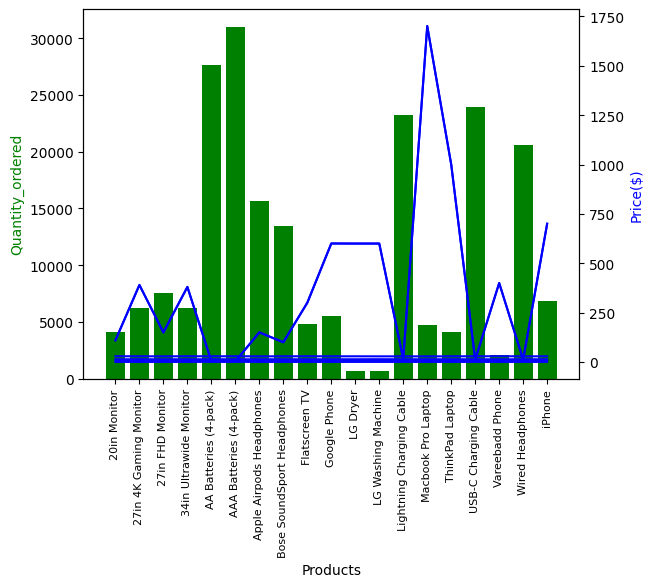

In [32]:
product_group = all_data.groupby("Product").sum("Quantity Ordered")
quantity_ordered = product_group["Quantity Ordered"]
products = product_group.index
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color ='g')
ax2.plot(products,prices,color ='b')
ax1.set_ylabel("Quantity_ordered", color = 'g')
ax1.set_xlabel("Products")
ax2.set_ylabel("Price($)",color = 'b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)




plt.show()

This graph shows the correlation between Price of the product and Quantity of product sold.***Whenever the Quantity_ordered is high the Price of the product is low***  
***Hence,One of the reasons for high number of sales is Products that sold the most was Cheaper than the rest of the products***